# Conjugate Gradient
## The algorithm

Given **Q**-conjugate directions $\{ d^{(j)} \} \quad j=0,1,\dots, n-1$

1. Start with initial guess $\vec{x}^{(0)}$
1. For $k\ge 0$
    2. Compute: $$g^{(k)} = \nabla f(\vec{x}^{(k)}) = Q\vec{x}^{(k)} - \vec{b}$$
    2. Compute step size: $$ \alpha_k = -\frac{\vec{g}^{(k)T}\vec{d}^{(k)}}{\vec{g}^{(k)T}Q\vec{d}^{(k)}}$$
    2. Update: $$ \vec{x}^{(k+1)} = \vec{x}^{(k)} + \alpha_k\vec{d}^{(k)} $$
    2. Repeat until $||\nabla f(x)||< \epsilon$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

def conjugate_direction(Q, b, x0, D, eps):
    k = 0
    x = x0
    xlist = [x]
    glist = list()
    
    g = np.dot(Q,x) - b
    gNorm = np.linalg.norm(g)
    glist.append(gNorm)
    
    while gNorm > eps:
        # make step
        alpha = -np.dot(g, D[:, k])/np.dot(D[:, k], np.dot(Q, D[:, k]))
        x = x + alpha*D[:, k]
        xlist.append(x)
        
        g = np.dot(Q,x) - b
        gNorm = np.linalg.norm(g)
        glist.append(gNorm)
        
        k += 1
        print(f"iter: {k}\t\t x = ({x[0]}, {x[1]})\t norm(g) = {gNorm}")
    return np.array(xlist), np.array(glist)

Now let's minimise $$f(\vec{x}) = 2x_1^2 + x_2^2 + 2x_1x_2 + x_1 - x_2$$

Using conjugate direction algorithm, with the initial guess of $$x^{(0)} = \begin{pmatrix}0\\0 \end{pmatrix}$$

We set $\epsilon = 10^{-8}$

For $f(x)$

$$
Q = \begin{pmatrix} 4 & 2 \\ 2 & 2 \end{pmatrix}; \quad b = \begin{pmatrix} -1\\1\end{pmatrix}.
$$
and Q-conjugate directions are
$$
d^{(0)} = \begin{pmatrix} 1\\0 \end{pmatrix};\quad d^{(1)} = \begin{pmatrix} 1\\-2\end{pmatrix}
$$

In [2]:
Q = np.array([[4,2],[2,2]])
b = np.array([-1,1])
D = np.array([[1,1], [0,-2]])

x0 = np.array([0.0,0.0])
X, G = conjugate_direction(Q, b, x0, D, 1e-8)

iter: 1		 x = (-0.25, 0.0)	 norm(g) = 1.5
iter: 2		 x = (-1.0, 1.5)	 norm(g) = 0.0


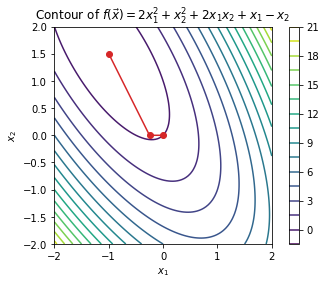

In [3]:
N = 100
p_min = -2
p_max = 2
x1_i = np.linspace(p_min, p_max, N)
x2_i = np.linspace(p_min, p_max, N)
x1, x2 = np.meshgrid(x1_i, x2_i)

f = 2*x1**2 + x2**2 + 2*x1*x2 + x1 - x2

plt.contour(x1, x2, f, 20)
plt.plot(X[:,0], X[:,1], "C3o-")

plt.colorbar()
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.title(r"Contour of $f(\vec{x}) = 2x_1^2 + x_2^2 + 2x_1x_2 + x_1 - x_2$")
plt.axes().set_aspect("equal")

## Conjugate gradient algorithm
1. Start with an initial guess $\vec{x}^{(0)}$
1. At k = 0 set the initial direction $\vec{d}^{(0)} = - \vec{g}^{(0)}$, where $\vec{g}^{(0)} = \nabla f(\vec{x}^{(0)})$
1. For $k\ge 0$:
    2. Compute step size: $$ \alpha_k = -\frac{\vec{g}^{(k)T}\vec{d}^{(k)}}{\vec{d}^{(k)T}Q\vec{d}^{(k)}} $$.
    2. Update: $$ \vec{x}^{(k+1)} = \vec{x}^{(k)} + \alpha_k\vec{d}^{(k)} $$
    2. Set: $$ \vec{g}^{(k+1)} = \nabla f(\vec{x}^{(k+1)}) $$
    2. Compute:  $$ \beta_k = \frac{\vec{g}^{(k+1)T}Q\vec{d}^{(k)}}{\vec{d}^{(k)T}Q\vec{d}^{(k)}} $$.
    2. Next direction: $$ \vec{d}^{(k+1)} = - \vec{g}^{(k+1)} +  \beta_k\vec{d}^{(k)}$$
    2. Repeat until $||\nabla f(x)||<\epsilon$

In [4]:
def conjugate_grad(Q, b, x0, eps):
    k = 0
    x = x0
    xlist = [x]
    glist = list()
    
    g = np.dot(Q,x) - b
    d = -g
    gNorm = np.linalg.norm(g)
    glist.append(gNorm)
    
    while gNorm > eps:
        # make step
        alpha = -np.dot(g, d)/np.dot(d, np.dot(Q, d))
        x = x + alpha*d
        xlist.append(x)
        
        g = np.dot(Q,x) - b
        gNorm = np.linalg.norm(g)
        glist.append(gNorm)
        
        # compute beta
        beta = np.dot(g, np.dot(Q,d))/np.dot(d, np.dot(Q,d))
        
        # update d
        d = -g + beta*d
        
        k += 1
        print(fr"iter: {k}, x^({k}) = {x}, norm(g) = {gNorm:.4f}, alpha_{k-1} = {alpha:.4f}, beta_{k-1} = {beta:.4f}, g_{k} = {g}, d_{k} = {d}")
    return np.array(xlist), np.array(glist)

Now let's minimise 
$$
f(\vec{x}) = \frac{3}{2}x_1^2 + x_2^2 - x_1x_2 - 3x_1
$$
Using conjugate gradient algorithm, with the initial guess of $$x^{(0)} = \begin{pmatrix}0\\0 \end{pmatrix}$$

We set $\epsilon = 10^{-8}$

For $f(x)$

$$
Q = \begin{pmatrix} 3 & -1 \\ -1 & 2 \end{pmatrix}; \quad b = \begin{pmatrix} 3\\0\end{pmatrix}.
$$

In [5]:
Q = np.array([[3,-1], [-1,2]])
b = np.array([3,0])
x0 = np.array([0,0])
X, G = conjugate_grad(Q, b, x0, 1e-8)

iter: 1, x^(1) = [1. 0.], norm(g) = 1.0000, alpha_0 = 0.3333, beta_0 = 0.1111, g_1 = [ 0. -1.], d_1 = [0.33333333 1.        ]
iter: 2, x^(2) = [1.2 0.6], norm(g) = 0.0000, alpha_1 = 0.6000, beta_1 = 0.0000, g_2 = [-4.4408921e-16  0.0000000e+00], d_2 = [4.4408921e-16 0.0000000e+00]


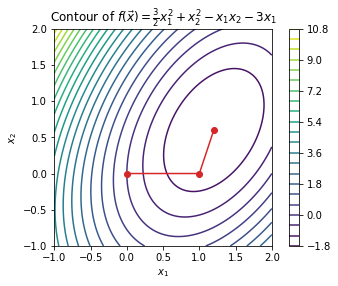

In [6]:
N = 100
p_min = -1
p_max = 2
x1_i = np.linspace(p_min, p_max, N)
x2_i = np.linspace(p_min, p_max, N)
x1, x2 = np.meshgrid(x1_i, x2_i)

f = 3/2*x1**2 + x2**2 - x1*x2 - 3*x1

plt.contour(x1, x2, f, 20)
plt.plot(X[:,0], X[:,1], "C3o-")

plt.colorbar()
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.title(r"Contour of $f(\vec{x}) = \frac{3}{2}x_1^2 + x_2^2 - x_1x_2 - 3x_1$")
plt.axes().set_aspect("equal")

## Homework
### Question 1
Minimise
$$
f(\vec{x}) = \frac{5}{2}x_1^2 + \frac{1}{2}x_2^2 - 2x_1x_2 - 3x_1-x2
$$

iter: 1, x^(1) = [0.51724138 0.17241379], norm(g) = 0.2181, alpha_0 = 0.1724, beta_0 = 0.0048, g_1 = [-0.06896552  0.20689655], d_1 = [ 0.08323424 -0.20214031]
iter: 2, x^(2) = [ 1. -1.], norm(g) = 0.0000, alpha_1 = 5.8000, beta_1 = -0.0000, g_2 = [8.8817842e-16 4.4408921e-16], d_2 = [-9.41775393e-16 -3.13925131e-16]


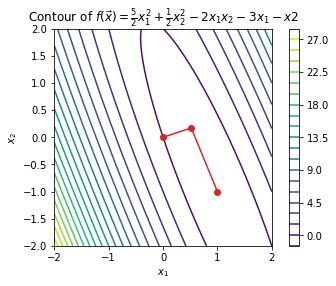

In [7]:
Q = np.array([[5,2], [2,1]])
b = np.array([3,1])
x0 = np.array([0,0])
X, G = conjugate_grad(Q, b, x0, 1e-8)

N = 100
p_min = -2
p_max = 2
x1_i = np.linspace(p_min, p_max, N)
x2_i = np.linspace(p_min, p_max, N)
x1, x2 = np.meshgrid(x1_i, x2_i)

f = 5/2*x1**2 + 1/2*x2**2 + 2*x1*x2 - 3*x1 - x2

plt.contour(x1, x2, f, 20)
plt.plot(X[:,0], X[:,1], "C3o-")

plt.colorbar()
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.title(r"Contour of $f(\vec{x}) = \frac{5}{2}x_1^2 + \frac{1}{2}x_2^2 - 2x_1x_2 - 3x_1-x2$")
plt.axes().set_aspect("equal")

### Question 2
Minimise
$$
f(\vec{x}) = \frac{3}{2}x_1^2 + 2x_2^2 + \frac{3}{2}x_3^2 + x_1x_3 + 2x_2x_3 - 3x_1 - x_3
$$

In [15]:
Q = np.array([[3,0,1], [0,4,2], [1,2,3]])
Q

b = np.array([3,0,1])
x0 = np.array([0,0, 0])
X, G = conjugate_grad(Q, b, x0, 1e-8)

iter: 1, x^(1) = [0.83333333 0.         0.27777778], norm(g) = 0.8958, alpha_0 = 0.2778, beta_0 = 0.0802, g_1 = [-0.22222222  0.55555556  0.66666667], d_1 = [ 0.46296296 -0.55555556 -0.58641975]
iter: 2, x^(2) = [ 0.93457944 -0.12149533  0.14953271], norm(g) = 0.2383, alpha_1 = 0.2187, beta_1 = 0.0707, g_2 = [-0.04672897 -0.18691589  0.14018692], d_2 = [ 0.07948292  0.14761115 -0.18167526]
iter: 3, x^(3) = [ 1.00000000e+00 -2.77555756e-17  2.77555756e-17], norm(g) = 0.0000, alpha_2 = 0.8231, beta_2 = -0.0000, g_3 = [ 0.00000000e+00 -5.55111512e-17  0.00000000e+00], d_3 = [-1.45262826e-17  2.85337693e-17  3.32029316e-17]
